<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

**Для ознакомления с данными, хранящимися в датафрейме, выводим его первые 10 строк методом head()**

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Методом info() выводим основные данные о датафрейме**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Для оценки значений в числовых столбцах датафрейма, строим гистограммы методом hist()**

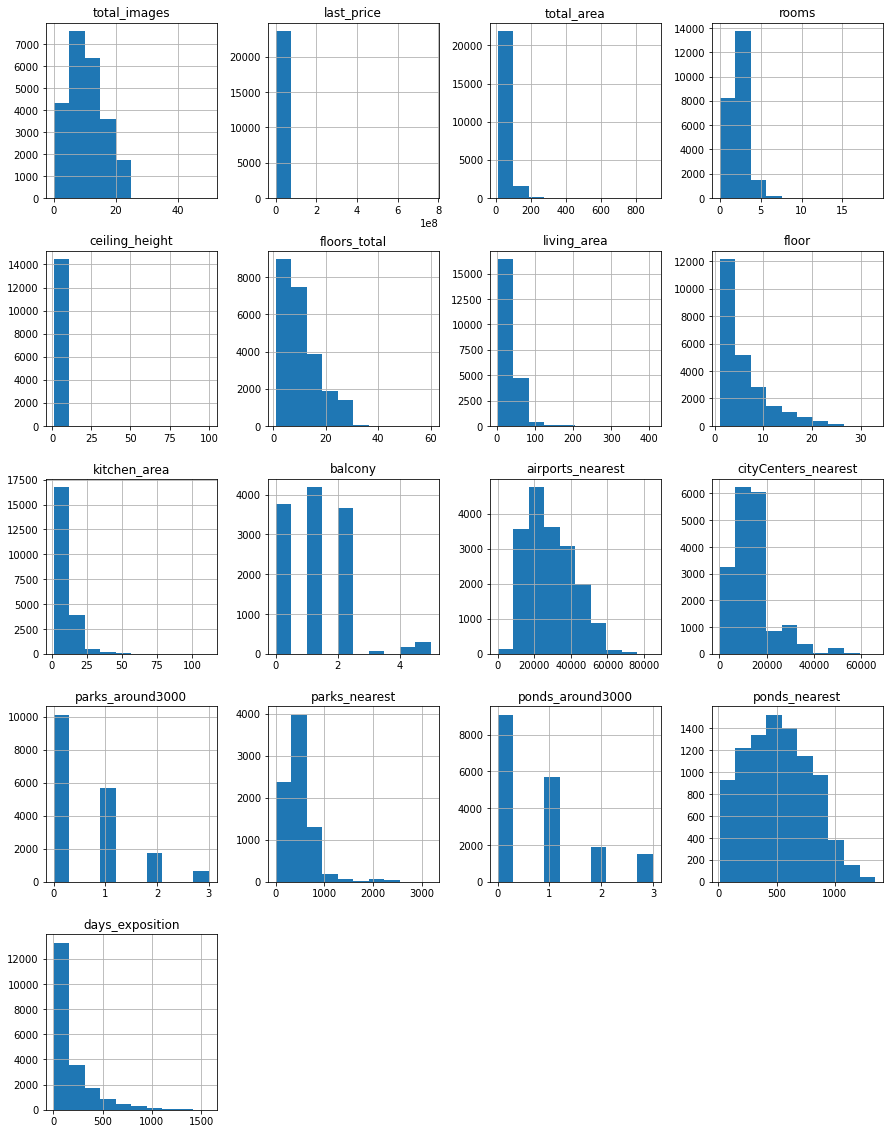

In [6]:
data.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>

Из полученных гистограмм, можно отметить выбросы в данных, которые в дальнейшем могут привести к ложным выводам при анализе. Явные выбросы можно видеть в столбцах `last_price`, `total_area`, `ceiling_height`.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Целью первичного анализа данных является выявление проблем с данными, с которыми нужно будет поработать. Чем больше всего мы найдём в этом шаге, тем лучше сможем построить дальнейший план работы и понять с чем нам стоит работать, а на что можно закрыть глаза. Старайся указывать как можно больше проблем в данных, которые ты найдешь (пропуски, дубликаты, неверный тип данных, странные значения и т.д.)
</div>

### Предобработка данных

#### Работа с пропусками
- Разберем каждый столбец, где есть пропуски, как заполнять эти пропуски и стоит ли их заполнять вообще

In [7]:
data.isna().sum() # Общее количество пропусков в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
data['ceiling_height'].describe() # для оценки значений столбца `ceiling_height` воспользуемся методом describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

- `ceiling_height` - высота потолков определяется строительными нормами и редко может выбиваться из стандартных значений. Применив метод describe() к столбцу `ceiling_height`, мы получаем, что в 75% случаев высота не превышаает 2,8м. Но поскольку в разных объектах недвижимости высота отличается, пустые строки заполним медианным значением. 

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

- `floors_total` - найти значение для заполнения пропусков в данном столбце довольно проблематично, так как данный столбец слабо коррелирует с другими столбцами датафрейма. Заполнять пропуски средним или медианным значением также некорректно и может привести лишь к искажению общей картины. К тому же количество пропусков составляет лишь доли процента от общего числа значений, поэтому данные пропуски оставим без изменений.

- `living_area` - значения данного столбца напрямую зависят от значений общей площади. В столбце `total_area` пропусков нет, отталкиваясь от этих значений заполним пропуски в столбце `living_area`. Используем отношение медианного значения `living_area` к `total_area` как коэффициент. Произведение `total_area` и этого коэффициента даст нам значение `living_area`.
Столбец `living_area` играет существенную роль при анализе рынка недвижимости, поэтому, чтобы убедится в корректности такого метода заполнения пропусков, вызовем метод `describe()` до и после заполнения пропусков.

In [10]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [11]:
data.loc[data['living_area'].isna(), 'living_area'] = \
round(data['total_area']*(data['living_area'].median() / data['total_area'].median()), 2)

In [12]:
data['living_area'].describe()

count    23699.000000
mean        34.624291
std         22.381876
min          2.000000
25%         19.000000
50%         30.000000
75%         42.170000
max        409.700000
Name: living_area, dtype: float64

Сравнивая полученные результаты, видим, что среднее значение и стандартное отклонение изменились на десятые доли, медиана не изменилась. Результат после заполнения пропусков - приемлемый.

- `is_apartment` - исходя из того, что апартаменты являются специфическим товаром на рынке недвижимости и количество пропусков составляет около 90% - предположим, что по умолчанию значение False (не апартаменты). Выяснить значение в данном столбце, опираясь на данные датафрейма вряд ли получится и может лишь привести к серьёзным ошибкам при анализе.

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

- `kitchen_area` - можно заполнить часть пропусков, опираясь на значения столбца `Studio`. Зная, что это студия, площадь кухни можем указать как ноль. 

In [14]:
data.query('studio == True') # смотрим, заполнены ли данные площади кухни в студиях

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,False,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,False,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,14.42,7,False,True,False,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,False,True,False,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,False,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,2.65,25.0,18.20,5,False,True,False,NaN,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,False,True,False,NaN,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.00,16,False,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,15.00,8,False,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [15]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0

In [16]:
data['kitchen_area'].isna().sum() # Проверяем, что количество пропусков в столбце 'kitchen_area' уменьшилось 

2129

- `balcony` - если не указаны данные о количестве балконов, то можно предположить, что их нет. Заполним пропуски нулями.

In [17]:
data['balcony'] = data['balcony'].fillna(0)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

- `parks_around3000`, `ponds_around3000` - отсутствие данных в этих двух столбцах может говорить лишь о том, что в радиусе трёх километров нет парка, водоема. Заменим пропуски нулями.

In [18]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [19]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

- **столбцы, в которых указаны расстояния до ближайших парка, водоема, аэропорта, центра города.** В каждом из этих столбцов значительное количество пустых строк. Но заполнять эти пропуски одинаковыми значениями не корректно, поскольку квартиры могут находиться в разных частях города. Также, например, в столбце `parks_nearest` пропусков больше половины от всех данных, соответсвенно нельзя найти значение для заполнения по меньшему количеству данных, и среднее, и медиана не подходят для этого. Поэтому столбцы о расстоянии оставим без изменений  

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> 
<br>Очень важно обоснование. Иногда пропуски можно удалить (если их мало), либо вообще не трогать, если у нас нет возможности подобрать аргументированный способ замены. Обращай внимание на то, на сколько сильно ты искажешь данные при заполнении пропусков.
</div>

In [31]:
data.head(10) # проверяем изменения в датасете

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,91.73,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,41.31,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


- `locality_name` - название населенного пункта - по сути, это один из ключевых факторов при выборе объекта недвижимости и пропуски здесь недопустимы. Восстановить эти пропуски вряд ли возможно, опираясь на датафрейм. Учитывая, что этих пропусков 0,2% от общего количества значений - удалим эти пропуски.

In [32]:
data = data.dropna(subset=['locality_name'])

Пропуски в столбце `days_exposition` могут говорить лишь о том, что данное объявление еще актульно. Оставим данный столбец без изменений.

In [33]:
data.isna().sum() # Проверяем, в каких столбцах еще остались пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2120
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

**Небольшое резюме по поиску и устранению пропусков в таблице. На данном этапе я руководствовался принципом "не навреди", т.е. там где зависимость прослеживается плохо - лучше оставить пропуски. При большом желании можно найти зависимость между данными, даже там где ее нет. Вот только в дальнейшем это может привести к ложным выводам. К тому же, неизвестно, а понадобятся ли нам эти данные в дальнейшем, т.е. можно потратить огромное количество времени на устранение пропусков, а по итогу эти пропуски ни на что не повлияли бы или они отвалятся сами в процессе построения различных выборок или сводных таблиц.**

#### Изменение типов данных

In [34]:
data.info() # Выведем еще раз общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21530 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Из данных видим, что столбцы с числовыми данными имеют тип `int` или `float`, что правильно. Также видим, что столбец `first_day_exposition` - `object`. День размещения объявления, все-таки, должен относится к типу `datetime`. Это необходимо для дальнейшего анализа, если нам понадобится извлечь день, месяц, год - столбец должен быть `datetime`.  Преобразуем данный столбец.

In [35]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [36]:
data.head() # Проверяем изменения

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,91.73,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [37]:
data.info() # Проверяем изменения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21530 non-null  float64       
 13  balcony         

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Ещё здесь нужно изменить тип данных в столбце balcony
</div>

In [38]:
data = data.astype({'balcony':'int64'})

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>В данном случае это ещё и вопрос внешнего вида. 1 балкон смотрится лучше чем 1.0 балкон. Это уменьшает количество отображаемых знаков и делает таблицу проще для восприятия
</div>

In [39]:
data.info() # Проверяем изменения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21530 non-null  float64       
 13  balcony         

#### Обработка дубликатов

**Устранение неявных дубликатов в столбце `locality_name`**

Для начала выведем уникальные значения и их количество в столбце `locality_name`, используя методы `unique()` и `count_values()`.

In [40]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [41]:
data['locality_name'].value_counts()

Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
садовое товарищество Рахья        1
поселок Жилпосёлок                1
деревня Сижно                     1
деревня Лаврики                   1
посёлок Петро-Славянка            1
Name: locality_name, Length: 364, dtype: int64

Изучив полученные данные, выполним следующее:
- приведем все данные в нижний регистр, чтобы выглядели одинаково - на случай если название населенного пунткта написали с маленькой буквы или же его тип с большой;
- из списка значений видно, что использование букв ё/е искажает картину. Приведем к одному типу - заменим "ё" на "е";
- название одного и того же населенного пункта указано и как "поселок городского типа" и как "городской поселок". (Рябово, Большая Ижора, Павлово - как примеры). Укажем их просто как "поселок"
- Мурино также указан как поселок Мурино, Кудрово также указан как деревня Кудрово. Википедия говорит, что данные населенные пункты относятся к городским поселениям. Доля объявлений из Кудрово и Мурино довольна существенная и такие данные могут привести к искажениям. Изменим данные в столбце на Кудрово и Мурино.


Для измененых значений создадим новый столбец `locality_name_new`

In [42]:
data['locality_name_new'] = data['locality_name'].str.lower()

In [43]:
data['locality_name_new'] = data['locality_name_new'].str.replace("ё", "е")

In [44]:
data['locality_name_new'] = \
data['locality_name_new'].replace([r"\городской поселок",  r"\поселок городского типа"], ["поселок", "поселок"], regex=True)

In [45]:
data = data.replace({'locality_name_new':{"поселок мурино":"мурино", "деревня кудрово":"кудрово"}})

In [46]:
data['locality_name_new'].value_counts() # проверяем изменения в столбце

санкт-петербург          15721
мурино                     590
кудрово                    472
поселок шушары             440
всеволожск                 398
                         ...  
поселок ромашки              1
поселок дзержинского         1
деревня большой сабск        1
деревня ялгино               1
деревня хязельки             1
Name: locality_name_new, Length: 320, dtype: int64

Проверив изменения в датафрейме можно заметить, что изначально было 364 уникальных значений в столбце. После изменений их стало 320

In [47]:
data['locality_name_new'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка',
       'деревня горбунки', 'деревня гостилицы', 'деревня заклинье',
       'деревня заневка', 'деревня зимитицы', 'деревня извара',
       'деревня иссад', 'деревня калитино', 'деревня кальтино',
       'деревня камышовка', 'деревня каськово', 'деревня келози',
       'деревня кипень', 'деревня кисельня', 'деревня колтуши',
       'деревня коркино', 'деревня котлы', 'деревня кривко',
       'деревня кузьмолово', 'деревня курковицы', 'деревня куровицы',
       'де

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

#### Поиск и устранение редких и выбивающихся значений

Для поиска и устранеия редких и выбивающихся значений обратимся к уже построенным гистаграммам, по которым можно определить столбцы, в которых явно присутствуют выбросы. К таковым можно отнести: `last_price`, `total_area`, `rooms`,`ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `balcony`.

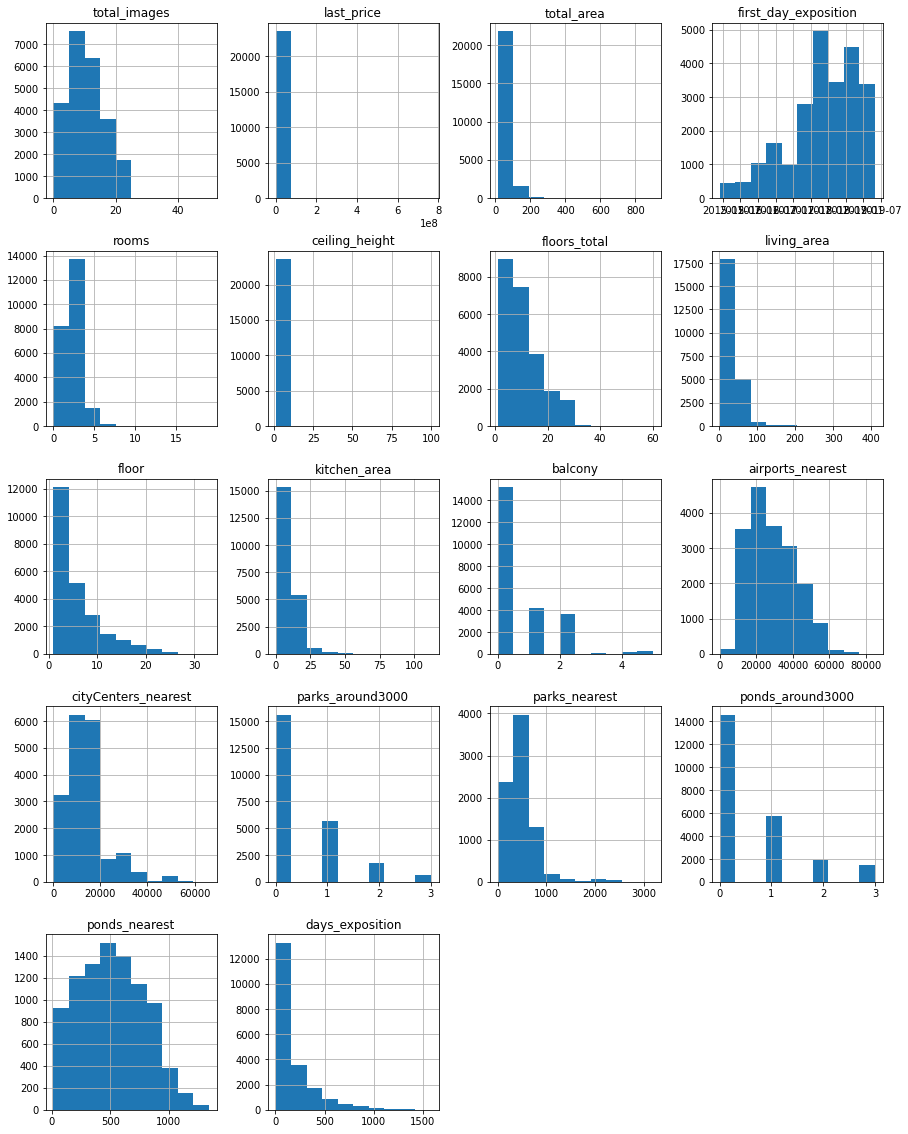

In [48]:
data.hist(figsize=(15, 20));

Для начала рассмотрим столбцы датафрейма с выбивающимися значениями, где могли быть допущены ошибки при вводе дааных. К таковым может относиться `ceiling_height`. На гистограмме видно, что значения идут к 100м. - трудно представить себе такой потолок. Для начала выведем список уникальных значений столбца.

In [49]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Учитывая значения 32м., 26м., 24м, можно предположить ошибку при вводе данных и это 3,2м, 2,6м., 2,4м. Для исправления этой ошибки сделаем выборку, в которой значения превышают 20м. и разделим на 10.

Кроме слишком высоких потолков, можно заметить и слишком низкие - 1м., 1.2м. Найдем количество объявлений, где высота потолков меньше 2м.

In [50]:
len(data.loc[data['ceiling_height'] < 2, 'ceiling_height'])

3

Объявлений со слишком низкими потолками всего 3. Удаление этих данных не изменит общей картины при анализе. (сложно определить вероятную причину появления подобных данных)

Далее изменим выбивающиеся значения, такие как 32м. и 25м. и избавимся от объявлений с потолками ниже 2м.

In [51]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height']/10

In [52]:
data = data.query('ceiling_height >= 2')

In [53]:
data.loc[(data['ceiling_height'] < 2) & (data['ceiling_height'] >= 20), 'ceiling_height'] 
# Потолков ниже 2м. и выше 20м. в таблице больше нет

Series([], Name: ceiling_height, dtype: float64)

Определить по гистограммам аналогичные ошибки в других столбцах проблематично. Например, `living_area` также имеет выбивающиеся значения. Можно посмотреть подробнее и выяснить нет ли там ошибок. Для этого возьмем жилую площадь более 80 м2, и выведем данные об общей площади, чтобы убедиться, не превышает ли жилая площадь общую площадь помещения и данные правдоподобны.

In [54]:
data.loc[data['living_area'] >= 80, 'total_area']

3        159.0
35       149.0
42       161.8
52       136.0
121      180.0
         ...  
23448    180.0
23491    250.0
23514    136.5
23516    139.5
23622    114.0
Name: total_area, Length: 797, dtype: float64

В целом, данные выглядят правдоподобно, но здесь стоит посмотреть на общее количество данных в выборке - от общего числа строк датафрейма это около 3 процентов. По сути мы можем отнести эти данные к выбросам. Для подтверждения построим диаграмму размаха.

(0.0, 100.0)

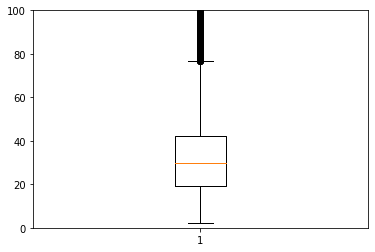

In [55]:
plt.boxplot(x=data['living_area'])
plt.ylim(0,100)

Из диаграммы видно, что данные выше 80 уже можно отнести к выбросам. Аналогично посмотрим данные об общей площади.

(0.0, 150.0)

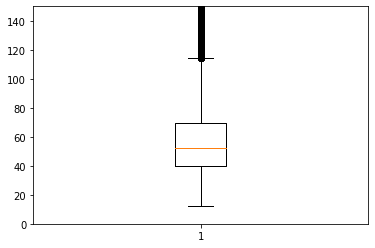

In [56]:
plt.boxplot(x=data['total_area'])
plt.ylim(0,150)

Все что выше 120 можно относить к выбросам.

Теперь, чтобы не избавиться от слишком большого количества данных, определим столбцы, в которых выбросы существенно могут повлиять на анализ данных. В первую очередь это цена объекта недвижимости, также площади: общая, жилая и кухня и количество комнат.

Наблюдение можно считать выбросом, если оно больше, чем значение верхнего квартиля плюс 1.5 межквартильного размаха. Воспользуемся данным определением, чтобы избавиться от выбросов в датафрейме. Функция ниже находит значение для столбца, за пределами которого данные в этом столбце будут относится к выбросам.  

In [57]:
def too_much(column):
    x = 1.5*(column.quantile(0.75) - column.quantile(0.25)) + column.quantile(0.75)
    return x

Используя эту функцию, удалим значения в датафрейме, не удовлетворяющие данным условиям

In [58]:
data = (
data.loc[(data['last_price'] < too_much(data['last_price'])) &
         (data['total_area'] < too_much(data['total_area'])) &
         (data['living_area'] < too_much(data['living_area'])) &
         (data['kitchen_area'] < too_much(data['kitchen_area'])) &
         (data['rooms'] < too_much(data['rooms']))]    
)

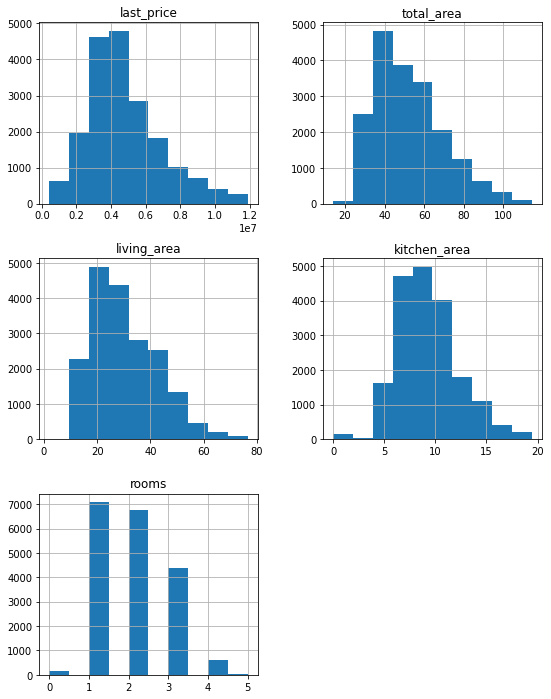

In [59]:
data.loc[:,['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].hist(figsize=(9,12));
# Построение гистограмм для столбцов, в которых были удалены выбросы 

Построив гистограммы после удаления выбросов, можно увидеть изменения в распределении значений - данные стремятся к нормальному распределению.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Диапазоны для аномальных значений подобраны и удалены верно!
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [60]:
data['sq_m_price'] = round(data['last_price'] / data['total_area'], 0)
# Создаем столбец, в котором указана цена квадратного метра объекта недвижимости

In [61]:
data['day_exposition'] = data['first_day_exposition'].dt.weekday
# Создаем столбец, в котором указан день недели, когда было размещено объявление

In [62]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
# Создаем столбец, в котором указан месяц, когда было размещено объявление

In [63]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
# Создаем столбец, в котором указан год размещения объявления

In [64]:
def floor_type(row):
    floor = row['floor']
    total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == total:
        return 'последний'
    return 'другой'

Написанная выше функция ` floor_type` возвращает тип этажа (первый, последний, другой). Аргумент функции `row` - строка датафрейма целиком, переменными `floor` и `total` обращаемся к конкретным столбцам. Далее создаем новый столбец `floor_type`, куда будут записываться результаты и применяем метод `apply` к датафрейму. Параметром `axis=1` указываем, что на вход нужно отправить строки датафрейма. 

In [65]:
data['floor_type'] = data.apply(floor_type, axis=1)

In [66]:
data['km_to_cityCenter'] = round(data['cityCenters_nearest'] / 1000, 0)
# Создаем столбец, в котором указано расстояние до центра города в километрах

In [67]:
data.head(10) # Выводим первые 10 строк датафрейма для проверки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,sq_m_price,day_exposition,month_exposition,year_exposition,floor_type,km_to_cityCenter
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок шушары,82921.0,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,санкт-петербург,92786.0,3,8,2015,другой,14.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,поселок янино-1,95066.0,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,поселок парголово,99196.0,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,41.31,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,санкт-петербург,110545.0,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0,мурино,87455.0,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,санкт-петербург,88525.0,6,2,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,санкт-петербург,127525.0,3,11,2017,другой,14.0
11,9,3300000.0,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,False,False,6.00,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,ломоносов,75000.0,0,8,2018,другой,52.0
12,10,3890000.0,54.00,2016-06-30,2,2.65,5.0,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,0.0,NaN,0.0,NaN,90.0,сертолово,72037.0,3,6,2016,последний,NaN


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

#### Изучение отдельных данных датасета

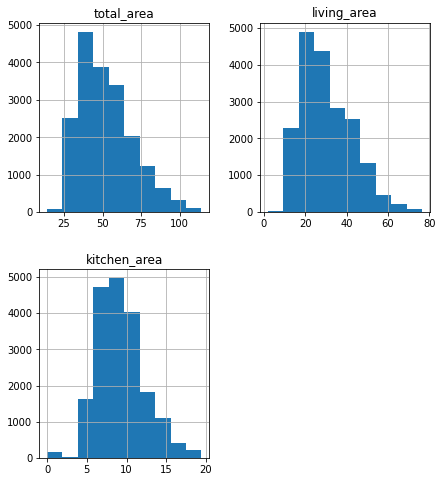

In [68]:
data.loc[:,['total_area', 'living_area', 'kitchen_area']].hist(figsize=(7,8));
# гистограмыы для общей площади, жилой площади и площади кухни

Полученные гистограммы можно описать как тяготеющие к нормальным. То, что гистограммы имеют резкий рост значений - пик - и более плавный спад, можно объяснить, что площадь имеет какие-то минимальные значения, т.е. крайне редко встречаются жилые помещения меньше 25 кв.м. общей площади или 10 кв.м. жилой. На каждой гистограмме можно увидеть пик наиболее часто встречающихся значений. Чаще всего продается недвижимость с общей площадью около 40 кв.м., жилой площадью 20 кв.м. и площадью кухни около 9 кв.м. Площадь кухни равная нулю говорит о количестве студий среди объявлений.

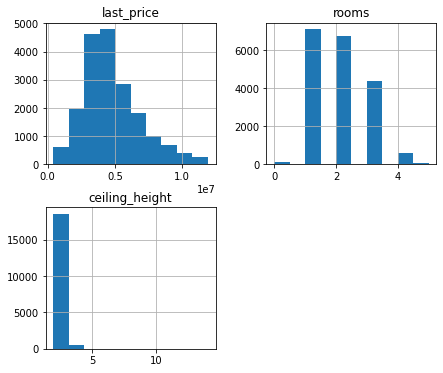

In [69]:
data.loc[:,['last_price', 'rooms', 'ceiling_height']].hist(figsize=(7,6));
# гистограммы для окончательной цены недвижимости, количества комнат и высоты потолков

Гистограмма, отображающая цену указывает, что в большинстве объявлений цена указана в районе 4 млн., найти что-то дешевле 2.5 млн. будет проблематично. Также на рынке есть редкие объекты с ценой выше 10 млн. В абсолютном большинстве случаев это 1-2х комнатные помещения. Для высоты потолков построим отдельную гистограмму, т.к. в датафрейме остались уникальные объекты с 10-метровыми потолками.

<AxesSubplot:>

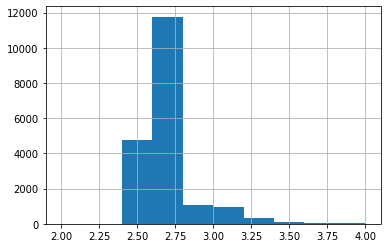

In [70]:
data['ceiling_height'].hist(range=(2, 4))

Большинство помещений с потолками высотой в районе 2.6 - 2.7 метра.

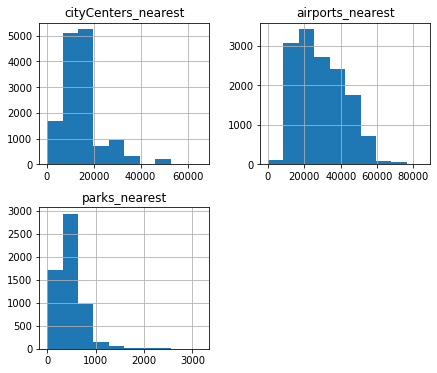

In [71]:
data.loc[:,['cityCenters_nearest', 'airports_nearest', 'parks_nearest']].hist(figsize=(7,6));
# гистограммы для расстояния до центра города, расстояния до аэропорта, расстояния до ближайшего парка

Для анализа построенных выше гистограмм нужно помнить, что в этих столбцах указаны большие значения взамен пустых строк, как обозначения, что эти объекты очень далеко. Т.е. в большинстве объявлений нет поблизости парка. До аэропорта в значительной части объявлений также довольно далеко и это, кстати, коррелирует с гистограммой о расстоянии до центра города, где в большинстве объявлений указано расстояние до 25 км., т.е. чем ближе к центру города, тем дальше до аэропорта.

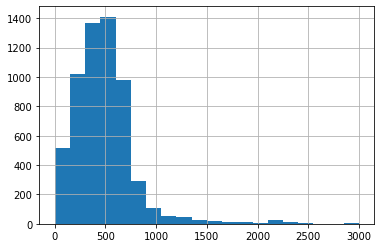

<AxesSubplot:>

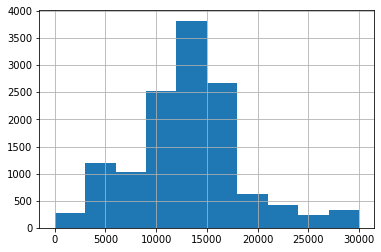

In [72]:
data['parks_nearest'].hist(bins=20, range=(0,3000))
plt.show()
data['cityCenters_nearest'].hist(range=(0,30000))

Построив гистограммы с количеством объектов непосредственно рядом с парками или недалеко от центра города, можно увидеть, что в целом таких объектов не так много.

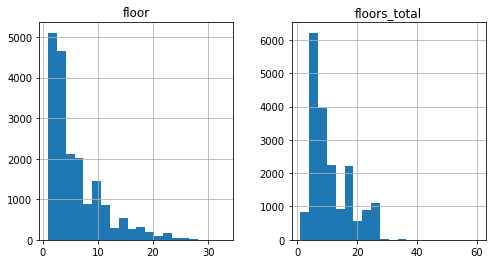

<AxesSubplot:>

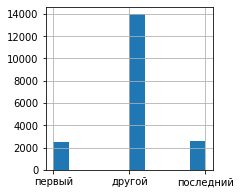

In [73]:
data.loc[:,['floor', 'floors_total']].hist(bins=20, figsize=(8,4))
# гистограммы для описания, на каком этаже находятся квартиры и общее количество этажей в доме
plt.show()
data['floor_type'].hist(figsize=(3,3)) # гистограмма, отображающая тип этажа

Построенные выше гистограммы указывают, что среди объявлений лидирую дома с этажностью менее 10, сами объекты распределены в основном между 2 и 5 этажами.

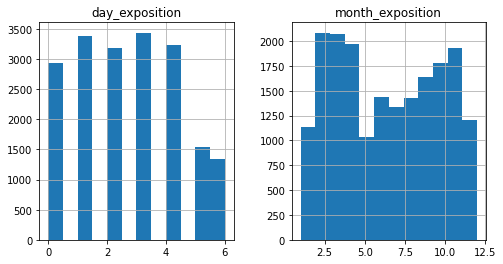

In [74]:
data.loc[:,['day_exposition', 'month_exposition']].hist(bins=12,figsize=(8,4));
# гистограммы, отображающие день и месяц размещения объявления

На гистограммах выше четко видно, что большинство объявлений размещается в будние дни. Относительно календарного года - чаще всего это в период февраль-апрель. Провал в мае можно объяснить праздниками и длинными выходными, когда люди включаются в садово-огородный сезон. Декабрь и январь - новый год, подготовка и отдых - также не самый популярный период для размещения объявлений 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>


#### Длительность размещения объявления

Далее проанализируем, сколько в среднем размещены объявления о продаже - построим гистограмму и найдем среднее значение и медиану.

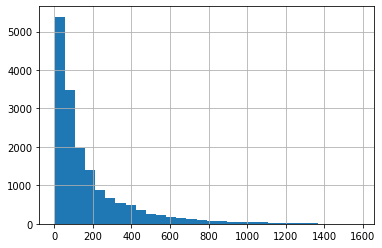

In [75]:
data['days_exposition'].hist(bins=30); # гистограмма, отображающая сколько дней были размещены объявления

In [76]:
data['days_exposition'].describe()

count    16645.000000
mean       175.758486
std        212.609561
min          1.000000
25%         42.000000
50%         95.000000
75%        224.000000
max       1580.000000
Name: days_exposition, dtype: float64

По гистограмме можно увидеть, что абсолютное большинство объявлений удаляются через полгола после размещения. После вызова метода `describe()` можно увидеть среднее значение и медиану и насколько они отличаются. В данном случае оценивать по среднему будет не корректно, поскольку мы также видим, что минимальное заначение - 1, и трудно сказать, было ли объявление удалено из-за быстрой продажи или по другим причинам. Аналогично с максимальным значением - более 4 лет, и возможно объект был продан быстрее, но объявление забыли удалить. Поэтому оценим по медиане - 95 дней. Меньшие значения можно отнести к необычайно быстрым продажам. Что касается необычайно долгих продаж, здесь можно вернуться к гистограмме и сказать, что это все, что более полугода. И, подводя итог, можно сказать, что в среднем объявление размещено 3-6 месяцев.

#### Поиск зависимости стоимости недвижимости от различных факторов

Проведем анализ зависимости цены от площади помещений (общей, жилой, кухни), сколько комнат, на каком этаже находится объект, когда разместили объявление. 

In [77]:
data.pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area'])

,kitchen_area,living_area,total_area
last_price,,,
430000.0,6.00,16.000000,30.400000
450000.0,6.60,23.533333,40.633333
470000.0,8.25,30.000000,42.750000
490000.0,5.50,17.000000,29.100000
500000.0,7.80,21.033333,38.900000
...,...,...,...
11858000.0,13.80,36.200000,76.100000
11866860.0,10.90,67.800000,107.800000
11879250.0,12.35,36.150000,70.500000


Из сводной таблицы выше сложно провести адекватный анализ - мы получили около 2000 строк, и сложно проанализировать их между собой. Но даже сейчас можно заметить, что не всегда цена выше у объектов с большей площадью (как пример 4 строка, 4.9 млн.). Это может говорить о влиянии других факторов - например близость к центру города. Но все же для более удобного анализа разобъем объявления на категории, в зависимости от цены объекта. И построенная ранее гистограмма показывает, на какие группы стоит разделить объявления. 

In [78]:
def price_cat(col):
    if col < 3000000:
        return '0 - 3 млн'
    if col > 3000000 and col < 4000000:
        return '03 - 4 млн'
    if col > 4000000 and col < 5000000:
        return '04 - 5 млн'
    if col > 5000000 and col < 6000000:
        return '05 - 6 млн'
    if col > 6000000 and col < 8000000:
        return '06 - 8 млн'
    if col > 8000000 and col < 10000000:
        return '08 - 10 млн'
    if col > 10000000 and col < 12000000:
        return '10 - 12 млн'
    return 'Более 12 млн'

Функция `price_cat` делит объявления на категории, в зависимости от стоимости объекта. После чего создаем новый столбец, куда помещаем полученные результаты, применив эту функцию к столбцу `last_price`

In [79]:
data['price_cat'] = data['last_price'].apply(price_cat)

Далее создадим сводную таблицу по новому столбцу и построим график к этой таблице

In [80]:
price_tab = data.pivot_table(index='price_cat', values=['total_area', 'living_area', 'kitchen_area'])

In [81]:
price_tab

,kitchen_area,living_area,total_area
price_cat,,,
0 - 3 млн,7.356806,24.000277,41.400975
03 - 4 млн,8.255015,23.256072,41.963235
04 - 5 млн,8.963654,28.313363,49.504818
05 - 6 млн,9.630103,33.703165,57.522431
06 - 8 млн,10.727313,38.403475,66.037585
08 - 10 млн,11.907531,45.359180,77.474407
10 - 12 млн,13.039934,49.103560,84.807516
Более 12 млн,9.154911,30.846399,53.004357


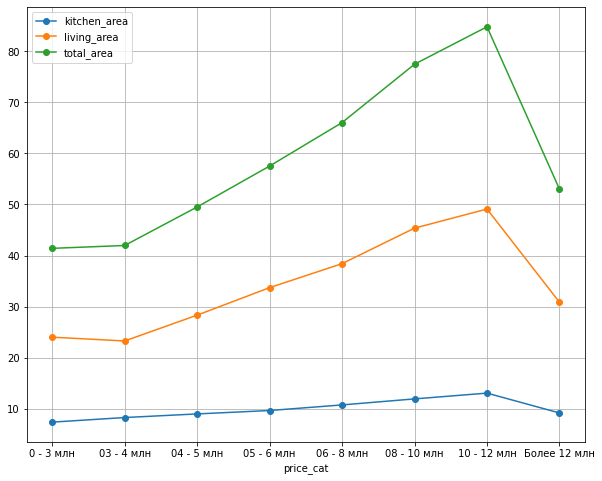

In [82]:
price_tab.plot(style='o-', grid=True, figsize=(10,8));

На графике хорошо видна зависимость цены от площади в интервале от 4 до 12 млн., причем  наибольший коэффициент этой линейной зависимости у кривой общей площади, наименьший - у кривой площади кухни (т.е. цена слабо зависит от площади кухни). В первом интервале (до 3 млн - 3-4 млн) можно увидеть, что с ростом цены площадь увеличивается слабо, а в случае с жилой площадью даже немного падает. То есть в ценовом сегменте до 4 млн., увеличение стоимости не говорит об обязательном увеличении площади помещения, здесь больше влияют какие-то другие факторы - где находится объект, близость инфраструктуры. Причем что-то похожее мы видим и со стоимостью более 12 млн. Когда с ростом цены, площадь начинает резко падать. По сути 12 млн - как отсечка для рынка недвижимости. Если до этого цена зависела непосредственно от самого объекта недвижимости, его площади, то после 12 млн гораздо больше влияют какие-то третьи факторы, например, близость к центру, или даже какие-то субъективные факторы (элитный район, дом, подъезд...)

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> В дополнение к графику, найдем числовые эквиваленты взаимосвязи между ценой и общей площадью, жилой и площадью кухни. Рассчитаем коэффициенты корреляции для каждой пары.
</div>

In [83]:
data['last_price'].corr(data['total_area'])

0.689230270459117

In [84]:
data['last_price'].corr(data['living_area'])

0.569266843631126

In [85]:
data['last_price'].corr(data['kitchen_area'])

0.4786216962401706

Рассчитанные коэффициенты корреляции как подтверждение вышесказанного - между ценой и площадью есть прямая зависимость. Чем больше площадь - выше стоимость. Наибольшая взаимосвязь между ценой и общей площадью помещения. Наименьшая - между ценой и площадью кухни.

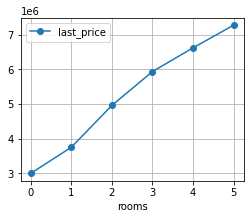

In [86]:
data.pivot_table(index='rooms', values='last_price').plot(style='o-', grid=True, figsize=(4,3));

Построив график зависимости стоимости от количества комнат, можно увидеть практически линейную зависимость - с увеличение количества комнат, растет и стоимость.

In [87]:
data['last_price'].corr(data['rooms'])

0.43474549714305655

Рассчитанный коэффициент корреляции подтверждает описанный график - с ростом числа комнат растет и стоимость. Но здесь стоит также отметить - из-за графика может сложиться ложное впечатление, что стоимость растет прямо пропорционально увеличению количества комнат, и двухкомнатная квартира будет в два раза дороже однокомнатной. Коэффициент корреляции же нам говорит - зависимость безусловно есть, но, скажем так, средняя. 

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай ещё добавим расчет корреляции для общей цены, общей площади, жилой площади, площади кухни и количества комнат используя .corr()
</div>

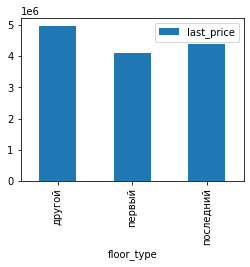

In [88]:
data.pivot_table(index='floor_type', values='last_price').plot(kind='bar', figsize=(4,3));

При сравнении стоимости на разных типах этажей, получаем, что дешевле всего покупать недвижимость на первом этаже. На последнем также дешевле, чем недвижимость между первым и последним этажами.

Далее оценим, зависит ли цена от даты размещения объявления. Для этого построим три гистограммы - зависимость стоимости от дня недели, месяца, года.

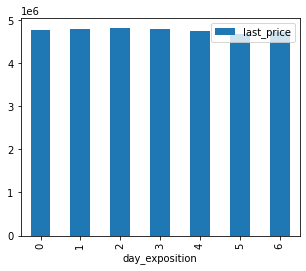

In [89]:
data.pivot_table(index='day_exposition', values='last_price').plot(kind='bar', figsize=(5,4));

Из гистограммы видим, что день недели слабо влияет на цену недвижимости.

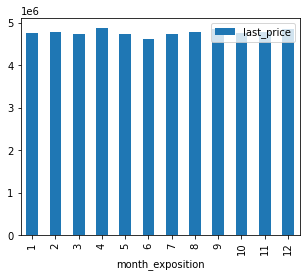

In [90]:
data.pivot_table(index='month_exposition', values='last_price').plot(kind='bar', figsize=(5,4));

Месяц, как и день недели, не оказывает существенное влияние на ценообразование на рынке недвижимости.

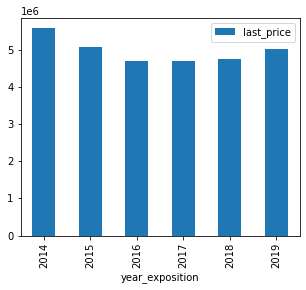

In [91]:
data.pivot_table(index='year_exposition', values='last_price').plot(kind='bar', figsize=(5,4));

Гистограмма зависимости цены от года размещения объявления дала интересный результат. Вопреки популярному мнению, что цена на недвижимость неуклонно растет и это удачный вариант для инвестиций - после 2014 года цены падали следующие 2 года и даже спустя пять лет, в 2019 году не достигли уровня 2014 года.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Создадим сводную таблицу по населенным пунктам, где укажем количество объявлений в этом населенном пункте и среднюю цену квадратного метра там.

In [92]:
sq_m_compare = data.pivot_table(index='locality_name_new', values=['sq_m_price'], aggfunc=['count', 'mean'])

In [93]:
sq_m_compare.columns=['Количество объявлений', 'Средняя цена кв.м.'] # переименовываем названия столбцов для надлежащего вида

In [94]:
sq_m_compare.sort_values('Количество объявлений', ascending=False).head(10)
# выводим первые десять населенных пунктов с наибольшим количеством объявлений

,Количество объявлений,Средняя цена кв.м.
locality_name_new,,
санкт-петербург,12176,105197.308640
мурино,492,86380.546748
поселок шушары,395,78882.331646
кудрово,374,95699.334225
всеволожск,352,67206.738636
колпино,315,75025.657143
пушкин,296,100196.648649
поселок парголово,287,90451.111498
гатчина,287,68481.393728


Из таблицы выше получаем, что Санкт-Петербург лидирует как по количеству объявлений, так и по стоимости одного квадратного метра. Самый дешевый квадратный метр недвижимости, среди этой десятки - в Выборге.

#### Стоимость каждого километра до центра Санкт-Петербурга при формировании цены на недвижимость

В дополнение к ранее найденному расстоянию до центра в километрах, теперь необходимо выделить квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислить среднюю цену каждого километра.

In [99]:
s_pb = data.query('locality_name_new == "санкт-петербург"')

In [100]:
s_pb_pivot = s_pb.pivot_table(index='km_to_cityCenter', values='sq_m_price')

In [101]:
s_pb_pivot.head(10)

,sq_m_price
km_to_cityCenter,
0.0,126848.000000
1.0,120564.636364
2.0,114690.541353
3.0,109992.292308
4.0,115955.245383
5.0,121742.565130
6.0,120860.029326
7.0,116333.606299
8.0,115913.911548


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Всё верно, но лучше вывести все данные, а не ограничивать первыми 10 км
</div>

In [102]:
s_pb_pivot.describe()

,sq_m_price
count,30.000000
mean,101582.752001
std,14228.349250
min,70312.000000
25%,92639.800021
50%,102776.190711
75%,113515.979092
max,126848.000000


Из сводной таблицы можно увидеть, что с увеличением расстояния от центра города, стоимость недвижимости падает. В центре города цена квадратного метра - 127 тысяч, на окраине же минимльная цена -70 тысяч. Используя метод describe() находим среднее значение квадратного метра - 101,5 тысячи. При этом можно обратить внимание, что медиана и среднее практически равны, что говорит о том, что в целом по всей выборке нет каких-либо резко выбивающихся значений.

### Общий вывод

<div> Цель данного проекта - анализ данных о продаже квартир в Санкт-Петербурге и соседних населенных пунктах. В ходе работы, на начальном этапе был проведен первичный анализ полученного датасета - выведена таблица для оценки хранящихся данных, выведена общая информация (количество столбцов, их названия, количество строк в каждом столбце, тип данных) Также построены гистограммы для всех числовых столбцов датасета. Результаты первичного анализа:
<br>- были обнаружены пропуски в столбцах датасета (в некоторых из них, как в `parks_nearest` и `is_apartment` число пропусков составляло более половины от общего числа строк)
<br>- в числовых столбцах присутствуют выбросы, искажающие общую картину
<br> Далее была выполнена предобработка данных. Для заполнения пропусков было выполнено следующее:
<br>- где было возможно выявить зависимость между данными датасета, данные были заполнены в соотвествии с этой зависимостью (столбец `living_area`)
<br>- была выдвинута гепотеза, что незаполненные данные говорят об отсутсвии таких параметров. Например, в столбцах о балконах или наличии парка в радиусе 3000м - если пропуск, значит этого нет, можно менять на ноль.
<br>- столбцы `cityCenters_nearest`, `airports_nearest`, `parks_nearest`, `ponds_nearest` остались без изменений. Заполнение пропусков могло привести к искажению результатов при анализе.
<br>- в столбцах `kitchen_area`, `total_floors` пропуски составляли незначительную долю, столбцы остались без изменений. Пропуски в столбце `days_exposition` означают, что объявление еще не снято, поэтому были оставлены без изменений.
<br>Также была проведена работа по устранению неявных дубликатов. В результате, в  столбце с названиями населенных пунктов количество уникальных значений сократилось с 365 до 320. Измененные названия населенных пунктов добавлены в новый столбец `locality_name_new`.
<br> Была проведена работа с аномалиями и выбивающимися значениями в столбцах. Опираясь на данные диаграммы размаха были удалены выбросы в столбцах `last_price`, `total_area`, `living_area`, `kitchen_area`.
<br> Далее, для последующего анализа, в таблицу были добавлены следующие столбцы:
<br>- цена одного квадратного метра недвижимости;
<br>- день публикации объявления (0 - понедельник, 1 - вторник и т.д.);
<br>- месяц публикации объявления;
<br>- год публикации объявления;
<br>- тип этажа квартиры (значения — «первый», «последний», «другой»);
<br>- посчитано и добавлено в таблицу: расстояние в км до центра города;
<br> Далее был выполнен исследовательский анализ данных, по результатам которого можно сделать следующие выводы:
<br>1. Среди продаваемых квартир, наиболее часто встречаются одно-двухкомнатные квартиры, с общей площадью в интервале 40 - 50 кв.м., жилой площадью около 20 кв.м. и площадью кухни 8 кв.м., с высотой потолка около 2,75м. В основном цены варьируются в интервале 4-5 млн. Наиболее часто встречающаяся этажность домов - менее десяти, квартиры преимущественно расположены не на первом и последнем этажах. Доля квартир с близлежащими парками (в радиусе 3 км) - не более трети от всех объявлений, в половине случаев удаленность от центра - более 20 км, т.е. объекты расположены на окраине или за пределами Санкт-Петербурга.
<br>2. Объявления в большинстве случаев выкладывают в будние дни. Относительно календарного года, меньше всего новых объявлений появляется в январе, мае и декабре, больше всего - февраль-апрель.
<br>3. Что касается продолжительности размещения объявления - медианное значение составляет 95 дней, в среднем можно говорить, что объявление висит 3-6 месяцев.
<br>4. При поиске зависимости цены от различных факторов, было обнаружено следующее:
<br>4.1. Зависимость цены от площади явно проявляется в ценовом сегменте  от 4 млн. до 12 млн. - когда цена растет с увеличением площади квартиры. Также, был обнаружен интересный факт по объектам дороже 12 млн - цена перестает зависеть непосредственно от самого объекта - его площади. Начинают больше влиять какие-то третьи факторы, например, близость к центру, или даже какие-то субъективные факторы (элитный район, дом, подъезд...). Что касается "дешевых" квартир, также было замечено, что все что до 4 млн - также больше формируются больше как субъективная оценка хозяина недвижимости и зависимость от площади квартиры низкая.
<br>4.2. Количество комнат напрямую влияет на цену - с ростом количества комнат растет и цена квартиры
<br>4.3. Квартиры на первом этаже уступают в цене квартирам, расположенным на верхних этажах
<br>4.4. Влияние дня недели или месяца, в котором выкладывалось объявление не оказывает существенной роли на цену. При этом было замечено общее падение цен после 2014 года.
<br>5. Были найдены первые десять населенных пунктов по количеству объявлений. Лидирует Санкт-Петербург, где доля объявлений составляет около 50% от общего числа. В первых 10 населенных пунктах по количеству объявлений, дороже всего квадратный метр квартиры стоит в Санкт-Петрбурге - 105197, дешевле всего в Выборге - 58243.
<br>6. Чем ближе квартира к центру города, тем выше стоимость квадратного метра. Максимальная стоимость квадратного метра, то есть непосредственно в центре города, составляет 127 тысяч, в среднем же цена равна 101,5 тысячи 
    <div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. А после этого нужно написать общий вывод использую информацию из промежуточных выводов после каждого раздела. Твой вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. 
    
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>